In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from skimage.io import imsave
from machinedesign.autoencoder.interface import load
from machinedesign.viz import grid_of_images_default, horiz_merge
from lightjob.cli import load_db
import keras.backend as K
import matplotlib.pyplot as plt
from IPython.display import Image
from fluentopt.utils import flatten_dict
import seaborn as sns
from scipy.stats import binned_statistic
pd.options.display.max_columns = 100
sns.set_style('white')
import sys
sys.path.append('..')
from hypers import get_df
def show_several(df):
    for j in df.index:
        print(j)
        show_one(j)
def show_one(j):
    X = np.load('../results/jobs/{}/gen/generated.npz'.format(j))['generated'][0:100]
    X = grid_of_images_default(X)
    imsave('out.png', X)
    im = Image('out.png')
    display(im)

Using Theano backend.


In [43]:
df_full = pd.read_csv('hypers.csv')
df_full = df_full.set_index('job_id')
#df_full = get_df()

## Fix stride. vary nb of layers

In [31]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
df = df[df['stride']==2]
df = df.sort_values(by='nb_layers')
df

,id,bottleneck,digits,digits_and_letters_entropy,digits_and_letters_object,digits_and_letters_objectness,digits_count,digits_diversity,digits_entropy,digits_frechet,digits_max,digits_mmd,digits_object,digits_objectness,digits_test,emnist_digits_count,emnist_digits_max,emnist_letters_count,emnist_letters_entropy,emnist_letters_max,emnist_object,emnist_objectness,hwrt,hwrt_diversity,hwrt_entropy,hwrt_objectness,hwrt_thin,letters_count,letters_diversity,letters_entropy,letters_frechet,letters_max,letters_mmd,letters_object,letters_objectness,nb_layers,nb_params,noise,noise_count,ratio_unique,sampler,stride,zero_ratio,innovative,existing,noisy,y
6,9e80faae4fb4ae36b2766648824eac09,128.0,0.0000,0.116791,0.883209,12.550046,0.086,0.800376,0.191304,6.500855e+07,0.078,0.002076,0.808696,4.151053,NaN,0.018,0.013,0.757,0.352276,0.141,0.647724,5.123708,0.0000,0.522073,0.082004,14.290085,NaN,0.848,0.810578,0.347885,1.427359e+08,0.501,0.002082,0.652115,5.316375,1,6529.0,NaN,0.066,0.967,mnist_deep,2.0,NaN,NaN,NaN,1.0,0.050268
8,68adffea6c98fedf329644122d56fa36,128.0,0.9847,0.039539,0.960461,19.538910,0.577,0.911845,0.087772,6.482822e+07,0.517,0.002000,0.912228,6.700230,NaN,0.090,0.080,0.568,0.248701,0.173,0.751299,13.314023,0.5403,0.788424,0.112240,57.670715,NaN,0.365,0.926126,0.116562,1.426116e+08,0.316,0.002006,0.883438,14.033784,2,825985.0,NaN,0.058,1.000,mnist_deep,2.0,NaN,1.0,NaN,NaN,0.704883
11,901dad8ec11f23191d86fa6279d47c65,128.0,0.9959,0.031575,0.968425,15.541529,0.707,0.915356,0.084485,6.481787e+07,0.656,0.002000,0.915515,6.845440,NaN,0.108,0.096,0.482,0.246643,0.154,0.753357,12.352144,0.6943,0.765771,0.100727,52.514980,NaN,0.250,0.927061,0.110468,1.426481e+08,0.213,0.002006,0.889532,14.415942,3,1645441.0,NaN,0.043,1.000,mnist_deep,2.0,NaN,1.0,NaN,NaN,0.782445
9,63c1be88f742117d115d076216ac85d1,128.0,0.9992,0.020904,0.979096,10.919588,0.849,0.916866,0.055326,6.480193e+07,0.794,0.002000,0.944674,7.269512,NaN,0.130,0.121,0.440,0.208254,0.196,0.791746,10.687059,0.6233,0.676443,0.095547,33.215351,NaN,0.124,0.778797,0.088160,1.426905e+08,0.113,0.002006,0.911840,9.548794,4,2464897.0,NaN,0.027,1.000,mnist_deep,2.0,NaN,NaN,1.0,NaN,0.427536
7,581582abec259852f4a01f7e79ed97db,128.0,0.9816,0.020118,0.979882,7.382170,0.964,0.851105,0.056269,6.483472e+07,0.886,0.002008,0.943731,6.220617,NaN,0.128,0.122,0.458,0.212822,0.178,0.787178,8.264774,0.1854,0.614825,0.109743,22.542377,NaN,0.024,0.767487,0.096898,1.427642e+08,0.021,0.002014,0.903102,9.044111,5,3284353.0,NaN,0.012,0.996,mnist_deep,2.0,NaN,NaN,1.0,NaN,0.124147
10,8ecaf99d22cf4cb469912b9fae25aac2,128.0,0.5753,0.008583,0.991417,4.169066,0.998,0.630844,0.042352,6.493132e+07,0.967,0.005644,0.957648,3.949130,NaN,0.098,0.093,0.331,0.196629,0.108,0.803371,5.691341,0.0206,0.426911,0.099368,8.652865,NaN,0.001,0.602850,0.086963,1.428706e+08,0.001,0.005650,0.913037,5.471218,6,4103809.0,NaN,0.001,0.593,mnist_deep,2.0,NaN,NaN,1.0,NaN,-0.016771


## Fix nb layers. Vary stride

In [11]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
df = df[df['nb_layers'] == 3]
df = df.sort_values(by='stride')
df

,id,bottleneck,digits,digits_and_letters_entropy,digits_and_letters_object,digits_and_letters_objectness,digits_count,digits_diversity,digits_entropy,digits_frechet,digits_max,digits_mmd,digits_object,digits_objectness,digits_test,emnist_digits_count,emnist_digits_max,emnist_letters_count,emnist_letters_entropy,emnist_letters_max,emnist_object,emnist_objectness,hwrt,hwrt_diversity,hwrt_entropy,hwrt_objectness,hwrt_thin,letters_count,letters_diversity,letters_entropy,letters_frechet,letters_max,letters_mmd,letters_object,letters_objectness,nb_layers,nb_params,noise,noise_count,ratio_unique,recons,sampler,stride,zero_ratio,innovative,existing,noisy,y
5,5511413bb44248b61f32518f638a8d9e,128.0,1.0000,0.043103,0.956897,15.068205,0.712,0.912121,0.109552,6.482374e+07,0.621,0.002,0.890448,6.414445,NaN,0.031,0.029,0.694,0.310742,0.131,0.689258,8.729666,0.9966,0.646863,0.100108,26.331829,NaN,0.231,0.917145,0.121261,1.426300e+08,0.193,0.002006,0.878739,13.536750,3,1645441.0,NaN,0.057,1.0,NaN,mnist_deep,0.0,NaN,NaN,NaN,1.0,0.776801
122,f316dedd30ebc5f51c4678f07979436c,128.0,1.0000,0.031410,0.968590,14.714568,0.773,0.924139,0.083757,6.478472e+07,0.713,0.002,0.916243,6.948976,NaN,0.081,0.073,0.572,0.254680,0.178,0.745320,12.290185,0.9722,0.775435,0.104893,55.180447,NaN,0.172,0.926554,0.101766,1.426092e+08,0.153,0.002006,0.898234,14.877086,3,1645441.0,NaN,0.055,1.0,NaN,mnist_deep,1.0,NaN,1.0,NaN,NaN,0.821865
70,901dad8ec11f23191d86fa6279d47c65,128.0,0.9959,0.031575,0.968425,15.541529,0.707,0.915356,0.084485,6.481787e+07,0.656,0.002,0.915515,6.845440,NaN,0.108,0.096,0.482,0.246643,0.154,0.753357,12.352144,0.6943,0.765771,0.100727,52.514980,NaN,0.250,0.927061,0.110468,1.426481e+08,0.213,0.002006,0.889532,14.415942,3,1645441.0,NaN,0.043,1.0,NaN,mnist_deep,2.0,NaN,1.0,NaN,NaN,0.782445
27,60168f92bfbc6331027b213e2e9d4f6f,128.0,0.9713,0.034976,0.965024,13.157985,0.771,0.937145,0.083086,6.482572e+07,0.694,0.002,0.916914,7.141914,NaN,0.122,0.109,0.453,0.245890,0.142,0.754110,10.135502,0.3448,0.757821,0.114442,47.322350,NaN,0.179,0.877613,0.115620,1.426912e+08,0.157,0.002006,0.884380,12.196813,3,1645441.0,NaN,0.050,1.0,NaN,mnist_deep,4.0,NaN,1.0,NaN,NaN,0.728883


## wta kchannel

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
df = df[df['zero_ratio']==0.9]
df = df.sort_values(by='nb_layers')
df

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
df = df[df['nb_layers']==4]
df = df.sort_values(by='zero_ratio')
df

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel_stride']
df = df.sort_values(by='nb_layers')
df.head()

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_capacity']
df = df[df['nb_layers']==3]
df = df.sort_values(by='bottleneck', ascending=False)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_noise']
df = df[df['nb_layers']==3]
df = df.sort_values(by='noise')
df = df[df['noise'] < 0.6]

In [ ]:
d = df_full.copy()
#d['y'] = d['emnist_letters_count']
d['y'] =  d['emnist_letters_count'] + 5*d['emnist_object'] + 10*d['letters_diversity']
#d['y'] =  30*d['emnist_digits_count'] + d['emnist_objectness']
#d['y'] = d['letters_objectness']
d = d.sort_values(by='y', ascending=False)
#show(d.iloc[0:10])

In [12]:
labels = [
    'emnist_digits_count',
    'emnist_letters_count',
    'digits_count', 
    'letters_count', 
    'digits_objectness', 
    'letters_objectness', 
    'digits_and_letters_objectness', 
    'emnist_objectness',
    'ratio_unique',
    'y',
]

d = df_full[labels].corr()
def m(val):
    color = 'yellow' if abs(val) > 0.8 else 'red' if abs(val) < 0.2 else 'white'
    return 'background-color: %s' % color

d = d.style.applymap(m)
d

,emnist_digits_count,emnist_letters_count,digits_count,letters_count,digits_objectness,letters_objectness,digits_and_letters_objectness,emnist_objectness,ratio_unique,y
emnist_digits_count,1,-0.194811,0.515856,-0.447775,0.35129,0.173744,-0.0223912,0.291231,0.168262,0.0147083
emnist_letters_count,-0.194811,1,-0.149142,0.271718,0.515015,0.629411,0.750398,0.521089,0.744356,0.340864
digits_count,0.515856,-0.149142,1,-0.889549,0.514348,0.397584,-0.0120687,0.485708,0.246039,0.34327
letters_count,-0.447775,0.271718,-0.889549,1,-0.410713,-0.291146,0.109984,-0.385495,-0.125427,-0.346316
digits_objectness,0.35129,0.515015,0.514348,-0.410713,1,0.913232,0.677031,0.955648,0.895915,0.684077
letters_objectness,0.173744,0.629411,0.397584,-0.291146,0.913232,1,0.818102,0.943213,0.87606,0.775016
digits_and_letters_objectness,-0.0223912,0.750398,-0.0120687,0.109984,0.677031,0.818102,1,0.701271,0.816552,0.547738
emnist_objectness,0.291231,0.521089,0.485708,-0.385495,0.955648,0.943213,0.701271,1,0.859931,0.738397
ratio_unique,0.168262,0.744356,0.246039,-0.125427,0.895915,0.87606,0.816552,0.859931,1,0.561225
y,0.0147083,0.340864,0.34327,-0.346316,0.684077,0.775016,0.547738,0.738397,0.561225,1


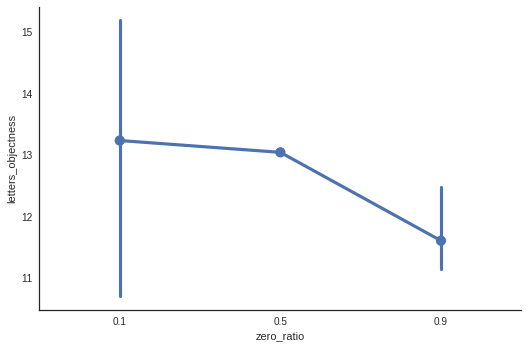

In [55]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel_stride']
df = df[df['nb_layers']==3]
#df = df[df['stride'] == 4]
#df = df[df['zero_ratio']<=0.6]
df = df.sort_values(by='zero_ratio')
sns.factorplot(x='zero_ratio', y='letters_objectness', data=df, size=5, aspect=1.5)
#show_several(df)

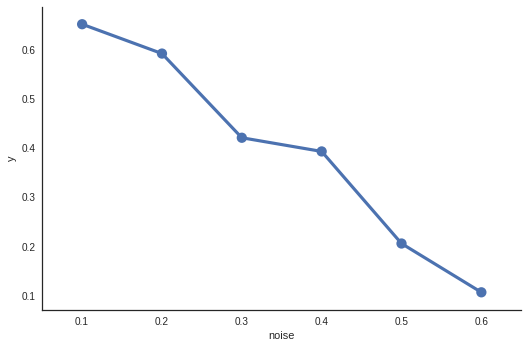

In [36]:
df = df_full
df = df[df['sampler'] == 'mnist_noise']
df = df[df['nb_layers']==3]
df = df[df['noise']<=0.6]
df = df.sort_values(by='noise')
sns.factorplot(x='noise', y='y', data=df, size=5, aspect=1.5)
#show_several(df)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_capacity']
df.loc[:, 'bottleneck'] = df['bottleneck'].astype(int)
df  = df[df['nb_layers']==3]
df = df.sort_values(by='bottleneck', ascending=False)
sns.factorplot(x='bottleneck', y='y', data=df, order=[64, 32, 16, 8, 4, 2], size=5, aspect=1.5)
#show_several(df)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep_kchannel']
df  = df[df['nb_layers']==5]
df = df.sort_values(by='zero_ratio')
#df = df[df['zero_ratio']>=0.4]
#sns.factorplot(x='zero_ratio', y='y', data=df, size=5, aspect=1.5)
#show_several(df)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
df = df[df['stride']==1]
sns.factorplot(x='nb_layers', y='y', data=df, size=5, aspect=1.5)

In [ ]:
df = df_full
df = df[df['sampler'] == 'mnist_deep']
#df = df[df['nb_layers']==6]
sns.factorplot(x='stride', y='emnist_letters_count', data=df, size=5, aspect=1.5)